# Regression with Linear Algebra - Lab

## Introduction

In this lab, you'll apply regression analysis using simple matrix manipulations to fit a model to given data, and then predict new values for previously unseen data. You'll follow the approach highlighted in previous lesson where you used Numpy to build the appropriate matrices and vectors and solve for the $\beta$ (unknown variables) vector. The beta vector will be used with test data to make new predictions. You'll also evaluate the model fit.

In order to make this experiment interesting, you'll use NumPy at every single stage of this experiment i.e. loading data, creating matrices, performing test train split, model fitting and evaluations.  

## Objectives

You will be able to:

* Use linear algebra to apply simple regression modeling in Python and NumPy only
* Apply train/test split using permutations in NumPy
* Use matrix algebra with inverses and dot products to calculate the beta
* Make predictions from the fitted model using previously unseen input features 
* Evaluate the fitted model by calculating the error between real and predicted values


First let's import necessary libraries 

In [43]:
import csv # for reading csv file
import numpy as np

## Dataset 

The dataset you'll use for this experiment is "**Sales Prices in the City of Windsor, Canada**", something very similar to the Boston Housing dataset. This dataset contains a number of input (independent) variables, including area, number of bedrooms/bathrooms, facilities(AC/garage) etc. and an output (dependent) variable, **price**.  You'll formulate a linear algebra problem to find linear mappings from input to out features using the equation provided in the previous lesson. 

This will allow you to find a relationship between house features and house price for the given data, allowing you to find unknown prices for houses, given the input features.  

A description of dataset and included features is available [here](https://rdrr.io/cran/Ecdat/man/Housing.html).

In your repository, the dataset is available as `windsor_housing.csv` containing following variables:

there are 11 input features (first 11 columns):

	lotsize	bedrooms  bathrms  stories	driveway  recroom	fullbase  gashw	 airco  garagepl   prefarea

and 1 output feature i.e. **price** (12th column). 

The focus of this lab is not really answering a preset analytical question, but to learn how you can perform a regression experiment, similar to one you performed in statsmodels, using mathematical manipulations. So you won't be using any Pandas or statsmodels goodness here. The key objectives here are to 
- understand regression with matrix algebra, and 
- mastery in NumPy scientific computation

## Stage 1: Prepare Data for Modeling 

Let's give you a head start by importing the dataset.You'll perform following steps to get the data ready for analysis:

* Initialize an empty list `data` for loading data
* Read the csv file containing complete (raw) `windsor_housing.csv`. [Use `csv.reader()` for loading data.](https://docs.python.org/3/library/csv.html). Store this in `data` one row at a time.

* Drop the first row of csv file as it contains the names of variables (header) which won't be used during analysis (keeping this will cause errors as it contains text values).

* Append a column of all 1s to the data (bias) as the first column

* Convert `data` to a Numpy array and inspect first few rows 

NOTE: `read.csv()` reads the csv as a text file, so you should convert the contents to float.

In [44]:
# Your Code here
data = []
with open('windsor_housing.csv', newline='') as csvfile:
    file = csv.reader(csvfile)
    for row in file:
        data.append(row)

data.remove(data[0])



# First 5 rows of raw data 

# array([[1.00e+00, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
#         0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
#         4.20e+04],
#        [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         3.85e+04],
#        [1.00e+00, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         4.95e+04],
#        [1.00e+00, 6.65e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
#         1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         6.05e+04],
#        [1.00e+00, 6.36e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
#         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
#         6.10e+04]])

In [45]:
data = [[1,1,1,1,1,1,1,1,1,1,1,1]] + data

In [46]:
data = np.array(data)

In [47]:
data = data.astype(float)

## Step 2: Perform a 80/20 test train Split

Explore NumPy's official documentation to manually split a dataset using `numpy.random.shuffle()`,  `numpy.random.permutations()` or using simple resampling method. 
* Perform a **random** 80/20 split on data using a method of your choice, in NumPy using one of the methods above
* Create x_test, y_test, x_train and y_train arrays from the split data
* Inspect the contents to see if the split performed as expected

In [48]:
# Your code here 
np.random.shuffle(data)
type(data)

numpy.ndarray

In [49]:



# Split results

x_train = data[0:438,0:11]
x_test = data[438:,0:11]
y_train = data[0:438,11]
y_test = data[438:,11]

# Raw data Shape:  (546, 13)
# Train/Test Split: (437, 13) (109, 13)
# x_train, y_train, x_test, y_test: (437, 12) (437,) (109, 12) (109,)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(438, 11)
(438,)
(109, 11)
(109,)


## Step 3: Calculate the `beta` 

With $X$ and $y$ in place, you can now compute your beta values with $x_\text{train}$ and $y_\text{train}$ as:
#### $\beta = (x_\text{train}^T. x_\text{train})^{-1} . x_\text{train}^T . y_\text{train}$

* Using numpy operations (transpose, inverse) that we saw earlier, compute the above equation in steps.
* Print your beta values

In [51]:
# Your code here 


x_train_T = np.transpose(x_train)

x_train_T_dot_x_train = x_train_T.dot(x_train)

x_train_T_dot_x_train_inv = np.linalg.inv(x_train_T_dot_x_train)

x_train_T_dot_y_train = x_train_T.dot(y_train)



# Calculated beta values

B = x_train_T_dot_x_train_inv.dot(x_train_T_dot_y_train)
B

# Due to random split, your answers may vary 
# [-3.07118956e+03  2.13543921e+00  4.04283395e+03  1.33559881e+04
#   5.75279185e+03  7.82810082e+03  3.73584043e+03  6.51098935e+03
#   1.28802060e+04  1.09853850e+04  6.14947126e+03  1.05813305e+04]

array([3.42273860e+00, 1.36021886e+03, 1.46888505e+04, 6.18672502e+03,
       5.55534051e+03, 2.70313814e+03, 4.39195156e+03, 1.01210037e+04,
       1.29082631e+04, 3.71747002e+03, 9.08602233e+03])

## Step 4: Make Predictions
Great, you now have a set of coefficients that describe the linear mappings between $X$ and $y$. You can now use the calculated beta values with the test datasets that we left out to calculate $y$ predictions. Next, use all features in turn and multiply it with this beta. The result will give a prediction for each row which you can append to a new array of predictions.

$\hat{y} = x\beta = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + \ldots + \beta_m x_m $ 

* Create new empty list (`y_pred`) for saving predictions
* For each row of x_test, take the dot product of the row with beta to calculate the prediction for that row
* Append the predictions to `y_pred`
* Print the new set of predictions

In [52]:
# Your code here 
y_pred = []

for i in range(0, len(x_test)):
    y = 0
    for j in range(0,11):
        y += x_test[i,j]*B[j]
    y_pred.append(y)

y_pred
    

[74034.83500188118,
 54354.745664481525,
 67705.87618816129,
 45030.399318942174,
 76171.00576368145,
 67673.73744559963,
 67919.40033206498,
 45409.36216526462,
 45327.59233031141,
 72575.86974650642,
 45606.29462576468,
 43373.20858745284,
 103266.2531767603,
 50366.643545498504,
 91950.30469674722,
 63297.51523967349,
 38998.33700622285,
 73082.82529107782,
 71249.11494555497,
 50602.40841054847,
 53908.40530478921,
 61226.953127270215,
 91883.39346446353,
 70458.20990972451,
 60163.815516566116,
 56981.822533789964,
 70421.83974889334,
 42157.76049150694,
 82099.84067968617,
 75383.65680572634,
 53803.114114713215,
 149226.9293029029,
 88360.37472644889,
 42330.05330341109,
 89811.43766468052,
 71315.0841589017,
 50919.9713176329,
 59940.224569313854,
 51928.33054390758,
 84493.18063577364,
 45967.84648660232,
 106390.53863923797,
 57518.045870070026,
 42842.30821229803,
 124244.80187866918,
 101815.95964697519,
 78060.78349770198,
 108144.28706032677,
 48164.47199845899,
 79192.66

## Step 5: Evaluate Model 

### Visualize Actual vs. Predicted values
This is exciting, now your model can use the beta value to predict the price of houses given the input features. Let's plot these predictions against the actual values in `y_test` to see how much our model deviates. 

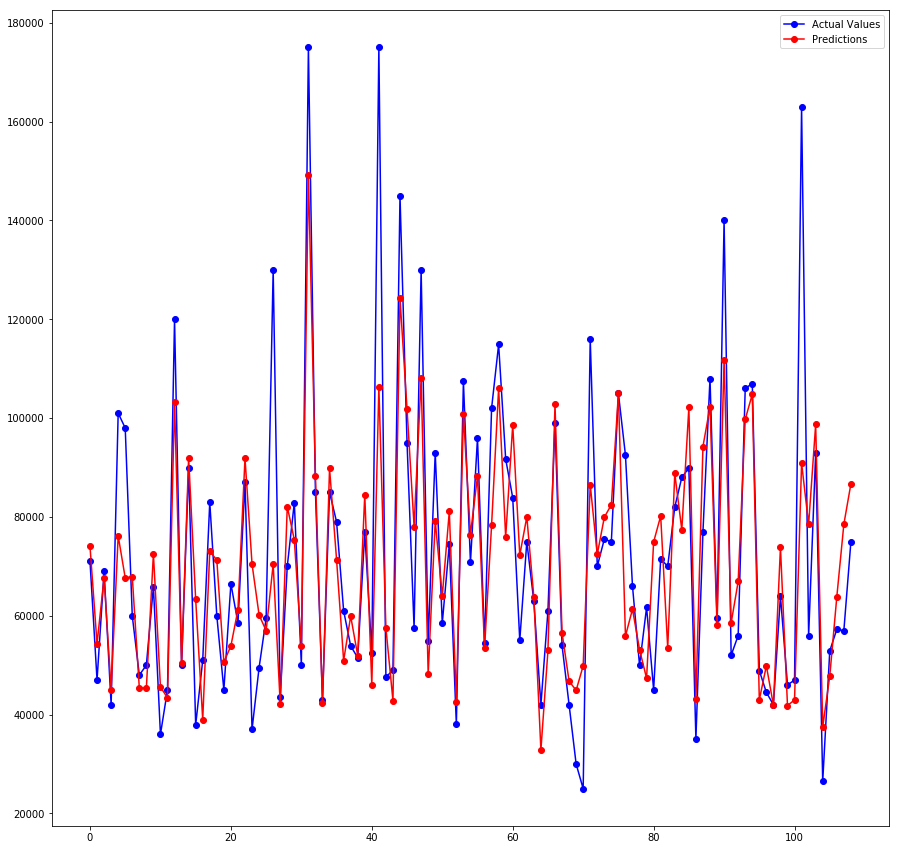

In [57]:
# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt

x = np.arange(0,109,1)
plt.figure(figsize=(15,15))
plt.plot(x,y_test,marker='o',color='blue',label='Actual Values')
plt.plot(x,y_pred,marker='o',color='red', label='Predictions')
plt.legend()
plt.show()


<img src ="images/diff.png" width="750">

This doesn't look so bad, does it? Your model, although isn't perfect at this stage, is making a good attempt to predict house prices although a few prediction seem a bit out. There could be a number of reasons for this. Let's try to dig a bit deeper to check model's predictive abilities by comparing these prediction with actual values of `y_test` individually. That will help you calculate the RMSE value (Root Mean Squared Error) for your model. 
### Root Mean Squared Error
Here is the formula for this again. 

$$ \large RMSE = \sqrt{\sum^N_{i=1}\dfrac{ (\text{Predicted}_i-\text{Actual}_i)^2}{N}}$$

* Initialize an empty array `err`
* for each row in `y_test` and `y_pred`, take the squared difference and append error for each row in the `err` array
* Calculate $RMSE$ from `err` using the formula shown above. 

In [65]:
err = np.zeros((109,1))
# Calculate RMSE
for i in range(0,len(y_test)):
    err[i,:] = (y_pred[i]-y_test[i])**2
 

# Due to random split, your answers may vary 

# RMSE = 16401.913562758735

In [67]:
RMSE = np.sqrt(np.sum(err)/len(err))
RMSE

16786.565297571524

### Normalized Root Mean Squared Error
The above error is clearly in terms of the dependent variable i.e. the final house price. You can also use a normalized mean squared error in case of multiple regression which can be calculated from RMSE using following formula:

* Calculate normalized Root Mean Squared Error


$$ \large NRMSE = \dfrac{RMSE}{max_i y_i - min_i y_i} $$

In [68]:
# Calculate NRMSE

max_y = np.max(y_test)
min_y = np.min(y_test)

NRMSE = RMSE/(max_y-min_y)
NRMSE

# Due to random split, your answers may vary 

# 0.09940553674399233

0.1119104353171435

There it is. A complete multiple regression analysis using nothing but Numpy. Having good programming skills in numpy allows you to dig deeper into analytical algorithms in machine learning and deep learning. Using matrix multiplication techniques you saw here, you can easily build a whole neural network from scratch. 

## Level up - Optional 

* Calculate the R_squared and adjusted R_squared for the above experiment
* Plot the residuals (similar to statsmodels) and comment on the variance and heteroscedascticity
* Run the experiment in statsmodels and compare the performance of both approaches in terms of computational cost

## Summary

In this lab, you built a predictive model for predicting house prices. Remember this is a very naive implementation of regression modeling. The purpose here was to get an introduction to the applications of linear algebra into machine learning and predictive analysis. There are still have a number of shortcomings in this modeling approach and you can further apply a number of data modeling techniques to improve this model. 